# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
# --- SETUP CELL v2 ---

# Install the local unityagents package
!pip install .

# Force the installation of a specific, compatible version of PyTorch
!pip install torch==1.13.1

# IMPORTANT: Downgrade protobuf to the required version for communication
!pip install protobuf==3.20.3

print("---")
print("--- SETUP v2 COMPLETE. ALL PACKAGES INSTALLED. ---")
print("---")

Defaulting to user installation because normal site-packages is not writeable
Processing /workspace/home/python
  Preparing metadata (setup.py) ... done


  Created wheel for unityagents: filename=unityagents-0.4.0-py3-none-any.whl size=71615 sha256=15dca3a08bed2828eedbede09407ef23f84d0a16b9cdba8bb06dc6972293f9c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-iho1njbk/wheels/7a/40/00/46cdf9603f1faf1c020d0c841b78009acc81cf9b5d130b0fc3
Successfully built unityagents
  Attempting uninstall: unityagents
    Found existing installation: unityagents 0.4.0
    Uninstalling unityagents-0.4.0:
      Successfully uninstalled unityagents-0.4.0

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python3 -m pip install --u

## Restart the Kernel
Restart the Kernel, and verify the protobuf version. 

In [2]:
import google.protobuf
print(google.protobuf.__version__)

3.20.3



## Instructions
The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis", no_graphics=True)

Found path: /data/Tennis_Linux_NoVis/Tennis.x86_64
Mono path[0] = '/data/Tennis_Linux_NoVis/Tennis_Data/Managed'
Mono config path = '/data/Tennis_Linux_NoVis/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.09500000160187483
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=256, fc2_units=128):
        """Initialize parameters and build model."""
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return torch.tanh(self.fc3(x))

class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=256, fc2_units=128):
        """Initialize parameters and build model."""
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        # Note: The critic takes the states and actions of BOTH agents
        self.fcs1 = nn.Linear((state_size + action_size) * num_agents, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic network that maps (state, action) pairs -> Q-values."""
        xs = torch.cat((state, action), dim=1)
        x = F.relu(self.fcs1(xs))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [8]:
import random
import copy
from collections import namedtuple, deque
import torch.optim as optim

# Hyperparameters
BUFFER_SIZE = int(1e6)
BATCH_SIZE = 256
GAMMA = 0.995
TAU = 1e-3
LR_ACTOR = 1e-4
LR_CRITIC = 3e-4
WEIGHT_DECAY = 0

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """A single agent in the MADDPG environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

        # Actor Network
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        self.noise = OUNoise(action_size, random_seed)
        
    def act(self, state, add_noise=True):
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()
        
    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""
    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        self.size = size
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        self.state = copy.copy(self.mu)

    def sample(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(self.size)
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""
    def __init__(self, action_size, buffer_size, batch_size, seed):
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["states", "actions", "rewards", "next_states", "dones"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)
        states = torch.from_numpy(np.array([e.states for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.array([e.actions for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.array([e.rewards for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.array([e.next_states for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.array([e.dones for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        return len(self.memory)

In [9]:
class MADDPG:
    def __init__(self, random_seed):
        self.buffer = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
        self.agents = [Agent(state_size, action_size, random_seed) for _ in range(num_agents)]

    def act(self, states, add_noise=True):
        actions = [agent.act(state, add_noise) for agent, state in zip(self.agents, states)]
        return np.array(actions)

    def step(self, states, actions, rewards, next_states, dones):
        self.buffer.add(states, actions, rewards, next_states, dones)
    
        # Only learn if there are enough samples in the buffer
        if len(self.buffer) > BATCH_SIZE:
            for _ in range(NUM_UPDATES):
                for agent_id in range(num_agents):
                    experiences = self.buffer.sample()
                    self.learn(experiences, agent_id)

    def learn(self, experiences, agent_id):
        states, actions, rewards, next_states, dones = experiences
        
        agent = self.agents[agent_id]
        other_agent_id = 1 if agent_id == 0 else 0

        # ---------------------------- update critic ---------------------------- #
        actions_next_target = torch.cat([self.agents[i].actor_target(next_states[:, i, :]) for i in range(num_agents)], dim=1)
        all_next_states = next_states.reshape(-1, num_agents * state_size)
        
        with torch.no_grad():
            q_targets_next = agent.critic_target(all_next_states, actions_next_target)
        
        q_targets = rewards[:, agent_id].unsqueeze(1) + (GAMMA * q_targets_next * (1 - dones[:, agent_id].unsqueeze(1)))
        
        all_states = states.reshape(-1, num_agents * state_size)
        all_actions = actions.reshape(-1, num_agents * action_size)
        q_expected = agent.critic_local(all_states, all_actions)
        
        critic_loss = F.mse_loss(q_expected, q_targets)
        
        agent.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(agent.critic_local.parameters(), 1)
        agent.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        actions_pred = [self.agents[i].actor_local(states[:, i, :]) if i == agent_id else actions[:, i, :] for i in range(num_agents)]
        actions_pred = torch.cat(actions_pred, dim=1)
        
        actor_loss = -agent.critic_local(all_states, actions_pred).mean()

        agent.actor_optimizer.zero_grad()
        actor_loss.backward()
        agent.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        agent.soft_update(agent.critic_local, agent.critic_target, TAU)
        agent.soft_update(agent.actor_local, agent.actor_target, TAU)

    def reset(self):
        for agent in self.agents:
            agent.reset()

Episode 100	Average Score: 0.018
Episode 200	Average Score: 0.017
Episode 300	Average Score: 0.019
Episode 400	Average Score: 0.000
Episode 500	Average Score: 0.009
Episode 600	Average Score: 0.011
Episode 700	Average Score: 0.001
Episode 800	Average Score: 0.009
Episode 900	Average Score: 0.037
Episode 1000	Average Score: 0.044
Episode 1100	Average Score: 0.061
Episode 1200	Average Score: 0.081
Episode 1300	Average Score: 0.088
Episode 1400	Average Score: 0.100
Episode 1500	Average Score: 0.107
Episode 1600	Average Score: 0.139
Episode 1700	Average Score: 0.169
Episode 1800	Average Score: 0.131
Episode 1900	Average Score: 0.243
Episode 2000	Average Score: 0.303
Episode 2100	Average Score: 0.301
Episode 2200	Average Score: 0.404
Episode 2300	Average Score: 0.429
Episode 2365	Average Score: 0.501
Environment solved in 2265 episodes!


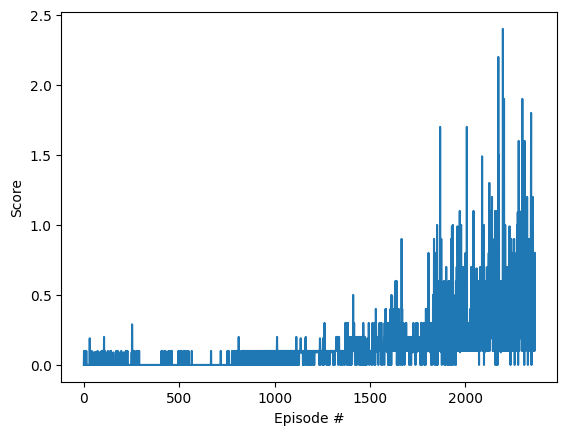

In [10]:
from collections import deque
import matplotlib.pyplot as plt

# --- Define update frequency ---
NUM_UPDATES = 1        # Increased "study time"
WARMUP_EPISODES = 300  # Episodes of pure random action

maddpg_controller = MADDPG(random_seed=0)

def train(n_episodes=6000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    all_scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        maddpg_controller.reset()
        episode_scores = np.zeros(num_agents)
        
        for t in range(max_t):
            # Add warmup phase
            if i_episode > WARMUP_EPISODES:
                actions = maddpg_controller.act(states)
            else:
                actions = np.random.randn(num_agents, action_size)
                actions = np.clip(actions, -1, 1)

            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            # Learn every step after warmup
            if i_episode > WARMUP_EPISODES:
                maddpg_controller.step(states, actions, rewards, next_states, dones)
            else: # Just add to buffer during warmup
                maddpg_controller.buffer.add(states, actions, rewards, next_states, dones)

            states = next_states
            episode_scores += rewards
            if np.any(dones):
                break
        
        max_score = np.max(episode_scores)
        scores_deque.append(max_score)
        all_scores.append(max_score)
        
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_deque):.3f}', end="")
        if i_episode % print_every == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_deque):.3f}')
            
        if np.mean(scores_deque) >= 0.5:
            print(f'\nEnvironment solved in {i_episode-100:d} episodes!')
            for i, agent in enumerate(maddpg_controller.agents):
                torch.save(agent.actor_local.state_dict(), f'checkpoint_actor_{i}.pth')
                torch.save(agent.critic_local.state_dict(), f'checkpoint_critic_{i}.pth')
            break
            
    return all_scores

scores = train()

# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 